
{% include toc title="In This Lesson" icon="file-text" %}

This lesson introduces the `data.frame` which is very similar to working with
a spreadsheet in `Python`.

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives
At the end of this activity, you will be able to:

* Open `.csv` or text file containing tabular (spreadsheet) formatted data in `Python`.
* Quickly plot the data using the Pandas function `.plot()`
* Quickly plot the data using Matplotlib plotting

## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What you need

You need `Python 3.x` and `Jupyter notebooks` to complete this tutorial. Also you should have
an `earth-analytics` directory setup on your computer with a `/data`
directory with it.

* [How to Setup R / R Studio](/course-materials/earth-analytics/week-1/setup-r-rstudio/)
* [Setup your working directory](/course-materials/earth-analytics/week-1/setup-working-directory/)


</div>

In the homework from week 1, we used the code below to create a report with `knitr`
in `Notebooks`. 

In [3]:
#import earthlab as et
# import python libraries
import numpy as np
import pandas as pd
import urllib
import os
from matplotlib import pyplot as plt

# Force notebooks to plot figures inline (in the notebook)
plt.ion()

# be sure to set your working directory 
os.chdir("/Users/lewa8222/Documents/earth-analytics/")
os.getcwd()

'/Users/lewa8222/Documents/earth-analytics'

In [4]:
# download data from figshare (note - we did this in a previous lesson)
urllib.request.urlretrieve(url='https://ndownloader.figshare.com/files/7010681', 
                           filename= 'data/boulder-precip.csv')

('data/boulder-precip.csv', <http.client.HTTPMessage at 0x110028390>)

Remember that earlier in the lessons we learned that the code above  `urllib.request.urlretrieve()` is used to 
download a datafile. In this case, the data are stored on
<a href="http://www.figshare.com" target="_blank">Figshare</a> - a
popular data repository that is free to use if your data are cumulatively
smaller than 20gb.

Remember that `urllib.request.urlretrieve()` function has two function **ARGUMENTS**:

1. **url**: this is the path to the data file that you wish to download
2. **filename**: this is the location on your computer (in this case: `/data`) and name of the
file when saved (in this case: boulder-precip.csv). So we downloaded a file from
a url on figshare do our data directory. We named that file `boulder-precip.csv`.

Next, we read in the data using the function: `pd.read_csv()`.

In [5]:
boulder_precip = pd.read_csv('data/boulder-precip.csv')
boulder_precip.head()

,Unnamed: 0,DATE,PRECIP
0,756,2013-08-21,0.1
1,757,2013-08-26,0.1
2,758,2013-08-27,0.1
3,759,2013-09-01,0.0
4,760,2013-09-09,0.1


In [6]:
# view the structure of the data.frame 
boulder_precip.dtypes


Unnamed: 0      int64
DATE           object
PRECIP        float64
dtype: object

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Optional challenge
What is the format associated with each column for the `boulder_precip`
data.frame? Describe the attributes of each format. Can you perform math
on each column? Why or why not?


<!--
integer - numbers without decimal points,
character: text strings
number: numeric values (can contain decimals places)
-->

</div>


## Introduction to the DataFrame

When we read data into Python using `pd.read_csv()` it imports it into a DataFrame format.
A DataFrame is a 2-dimensional data structure that can store data of different types (including characters, integers, floating point values and more) in columns. It is similar to a spreadsheet or an SQL database table. 

A dataframe is composed of columns and rows. Each column in a dataFrame object has the same number of rows.
Each cell in a dataframe is located or defined by a x,y (column, row) index value. 

Remember that in python, this index value begins at 0!  

A data frame can be created manually, however most commonly they are generated when
you important a text file or spreadsheet into Python using the Pandas function `pd.read_csv`.


## Extracting / Specifying "columns" By Name

We can extract one single column from a dataFrame using the syntax:

`data_frame_name['columnNameHere']`

as follows:


In [7]:
# view the date column of the data frame using its name (or header)
boulder_precip['DATE']

0     2013-08-21
1     2013-08-26
2     2013-08-27
3     2013-09-01
4     2013-09-09
5     2013-09-10
6     2013-09-11
7     2013-09-12
8     2013-09-13
9     2013-09-15
10    2013-09-16
11    2013-09-22
12    2013-09-23
13    2013-09-27
14    2013-09-28
15    2013-10-01
16    2013-10-04
17    2013-10-11
Name: DATE, dtype: object

In [8]:
# view the precip column
boulder_precip['PRECIP']

0     0.1
1     0.1
2     0.1
3     0.0
4     0.1
5     1.0
6     2.3
7     9.8
8     1.9
9     1.4
10    0.4
11    0.1
12    0.3
13    0.3
14    0.1
15    0.0
16    0.9
17    0.1
Name: PRECIP, dtype: float64

## View Structure of a Data Frame

We can explore the format of our data frame too. For instance, we can see how many rows and columns our dataframe has using the shape attribute. Here the shape of the object is returned as an array containing two numbers (# of rows, # of columns)

In [9]:
# view the number of rows and columns in our dataframe
boulder_precip.shape

(18, 3)

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> ## Optional challenge

Using our DataFrame `boulder_precip`, try out the attributes & methods below to see what they return.

* boulder_precip.columns
* boulder_precip.shape 

Take note of the output of shape - what format does it return the shape of the DataFrame in? HINT: More on tuples, here.

* `boulder_precip.head()` 
* What does `boulder_precip.head(15)` do?
* `boulder_precip.tail()`

</div>

In [10]:
# view the data structure of the data frame
boulder_precip.dtypes

Unnamed: 0      int64
DATE           object
PRECIP        float64
dtype: object

## Calculate dataframe statistics
We can quickly calculate summary statistics too. First let's explore the column names using `.columns.values`. We can use the `.describe()` function to get summary statistics about numeric columns in our data.


In [11]:
# view column names
boulder_precip.columns.values

array(['Unnamed: 0', 'DATE', 'PRECIP'], dtype=object)

In [12]:
# view summary statistics  - for all columns
boulder_precip.describe()

,Unnamed: 0,PRECIP
count,18.000000,18.000000
mean,764.500000,1.055556
std,5.338539,2.288905
min,756.000000,0.000000
25%,760.250000,0.100000
50%,764.500000,0.200000
75%,768.750000,0.975000
max,773.000000,9.800000


In [13]:
# view summary statistics  - for just the precip column
boulder_precip['PRECIP'].describe()

count    18.000000
mean      1.055556
std       2.288905
min       0.000000
25%       0.100000
50%       0.200000
75%       0.975000
max       9.800000
Name: PRECIP, dtype: float64

In [14]:
# view a list of just the unique precipitation values
pd.unique(boulder_precip['PRECIP'])

array([ 0.1,  0. ,  1. ,  2.3,  9.8,  1.9,  1.4,  0.4,  0.3,  0.9])

## Plot data

We can quickly plot our data too. Note that we are using the `.plot()` function.

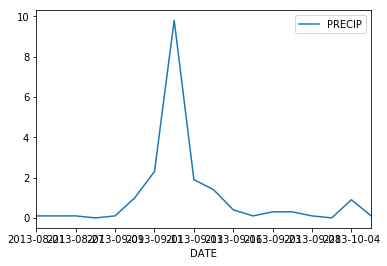

In [15]:
# setup the plot
boulder_precip.plot('DATE', 'PRECIP')

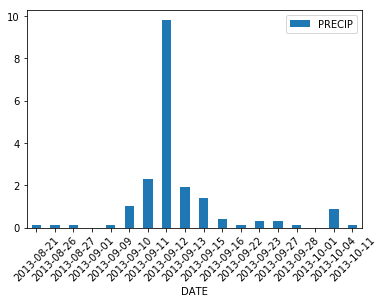

In [16]:
# create a barplot
ax = boulder_precip.plot('DATE', 'PRECIP', kind='bar')
# add labels to the plot on a 45 degree angle - this doesn't seem to be necessary 
plt.setp(ax.get_xticklabels(), rotation=45);

In [17]:
# convert DATE field to a datetime structure
boulder_precip['DATE'] = pd.to_datetime(boulder_precip['DATE'])
boulder_precip.dtypes


Unnamed: 0             int64
DATE          datetime64[ns]
PRECIP               float64
dtype: object

Let's take a little time to customize our plots. Below we add the following arguments to our plot:

* **title:** add a title to your plot
* **legend = False:** turn off the legend for hte plot
* **kind = bar**: create a bar plot


## need to better understand this. the code below now works but maybe this is a difference between pandas plot and matplotlib?

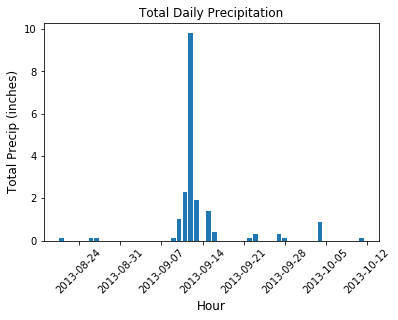

In [21]:
# here it seems that pandas understand dates?? does it by default?
fig, ax = plt.subplots()

ax.bar(boulder_precip['DATE'].values, boulder_precip['PRECIP'].values, data=boulder_precip)
ax.set_title("Total Daily Precipitation")

#ax = boulder_precip.plot('DATE', 'PRECIP', kind='bar')
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Total Precip (inches)", fontsize=12)
#ax.plot('DATE', 'PRECIP', data=boulder_precip)
#ax.xaxis.set_major_locator(dates.MonthLocator())
plt.setp(ax.get_xticklabels(), rotation=45);
